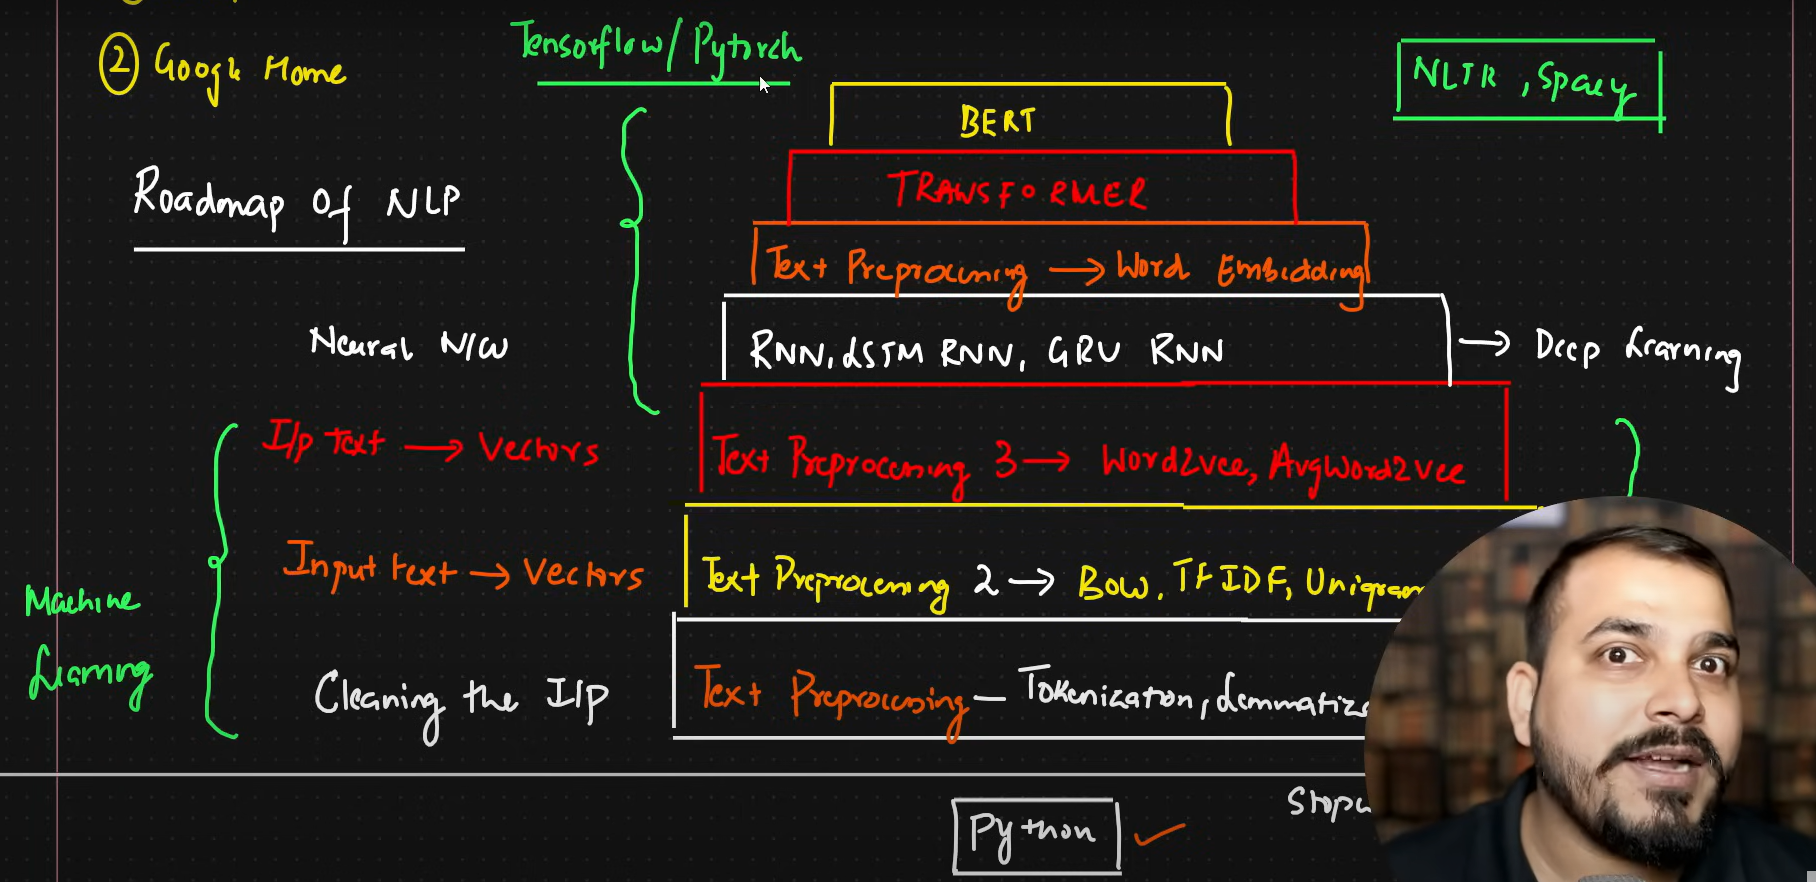

#### NLP in real life
- auto complete statements
- spelling correction
- auto reply suggestion
- spam filter mails
- language translator
- customer service chatbots ( using intent recognition)
- voice assistants (alexa, google assistant)
- google search ( using BERT )
- automated news generation
- information extraction

- corpus - paragraph
- documents - sentences
- vocabulary - unique words either in paragraph or sentence
- words - all the words present in paragraph

### NLP ( Natural Language Processing )
NLP is a field in computer science and AI that gives machines an ability to understand human language better and to assist in language related tasks

https://regex101.com/

Code to match phone numbers

In [ ]:
import re 

chat1='you ask lot of questions 1234567891, abs@xyz.com, another number 1234123444'
chat2='here it is : (123)-345-4567, hsdis_su@jhsdo.com'
chat3='yes, phone: 6789678988 and email id: testin23@ush.com'
chat4='hello, i am having issue with my order # 262537214323839'
chat5='i have a problem with my order number 262537383453329'
chat6='my order 26243245373839 is having an issue, i was charged extra'

phone_pattern='\d{10}|\(\d{3}\)-\d{3}-\d{4}'
email_pattern='[a-z0-9A-Z_]*@[a-z0-9A-Z]*\.[a-zA-Z]*'
order_pattern='order[^\d]*(\d*)'

In [ ]:
matches_phone=re.findall(phone_pattern, chat1)
matches_phone

In [ ]:
matches_email=re.findall(email_pattern, chat3)
matches_email

In [ ]:
matches_order=re.findall(order_pattern, chat6)
matches_order

### NLP Techniques
- Rules and Heuristics
- Machine Learning

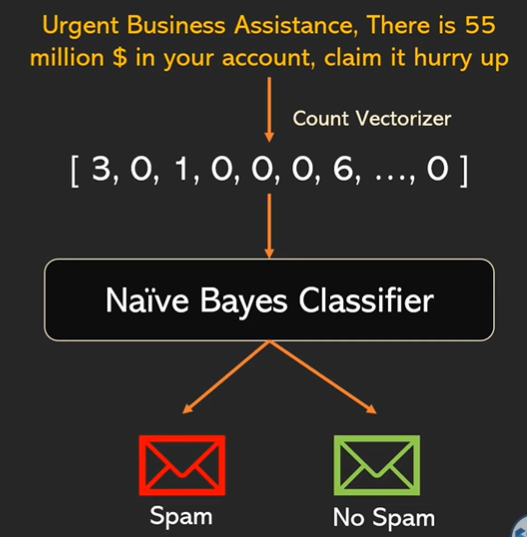 so count vertorzier will not work for all cases, then will use some deep learning technique called "sentence embeddings or word embeddings" using **BERT** (concept of cosine similarity)

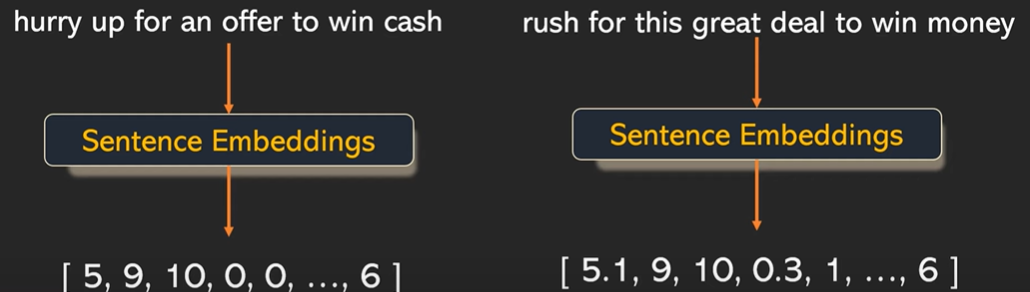
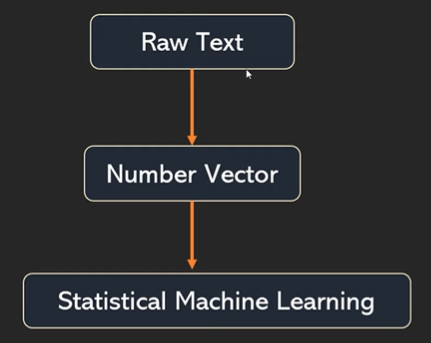

- Deep Learning: https://huggingface.co/sentence-transformers/paraphrase-xlm-r-multilingual-v1


### NLP Tasks
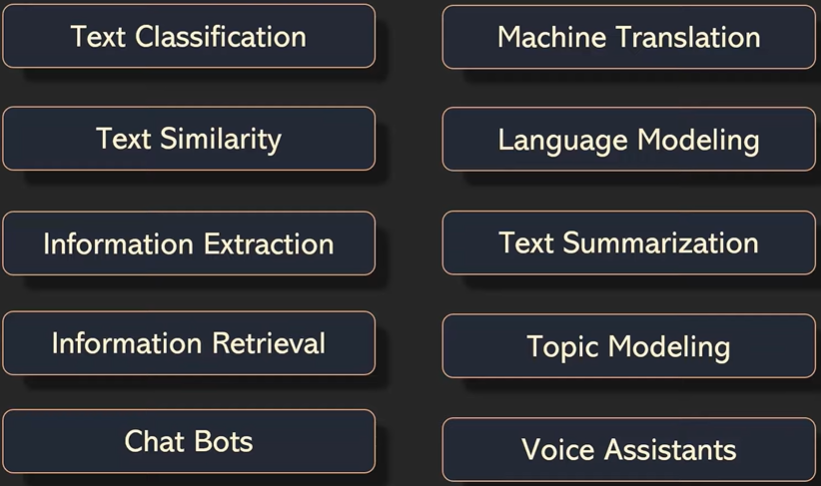

### Text Classification Tasks
- Customer complaint classification based on high, medium and low priority



- Health care documents to classify precription and patient medical report docs 



- Hate speech posts in Facebook or fake profile in LinkedIn


### Text Similarity Tasks
- Matching resume with job description

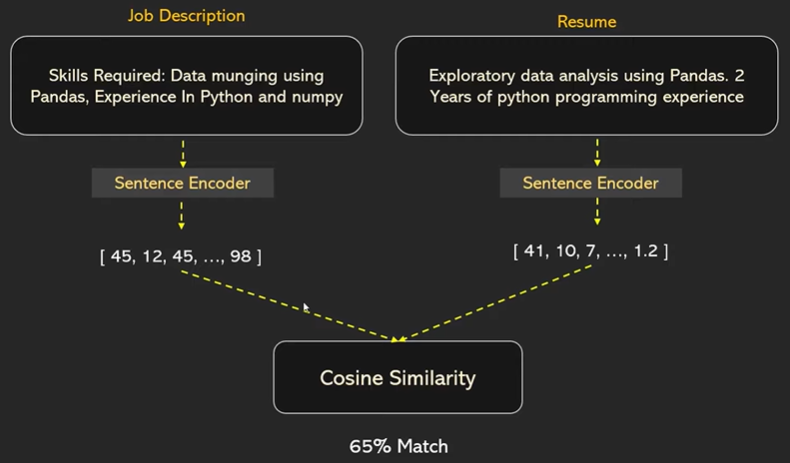

### Information Extraction Task
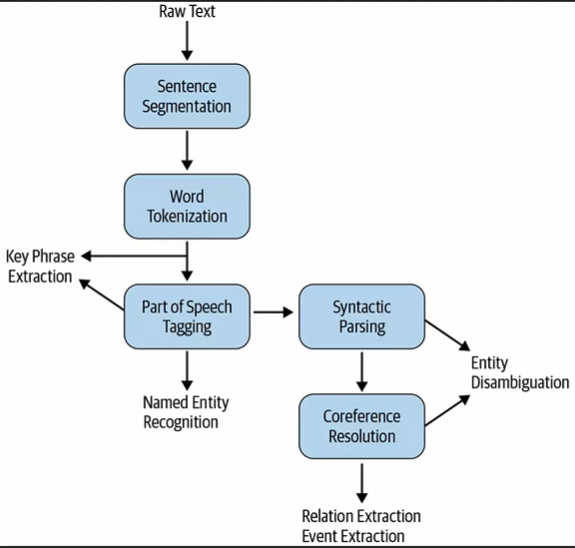

### Information Retrieval Task
- Google Search: when we search anything like "best food near me" then will get all the websites or pages related to our search in sorted order (most relevant to less)

### Chatbots
- FAQ Bot
- Flow-Based Bot
- Open-Ended Bot

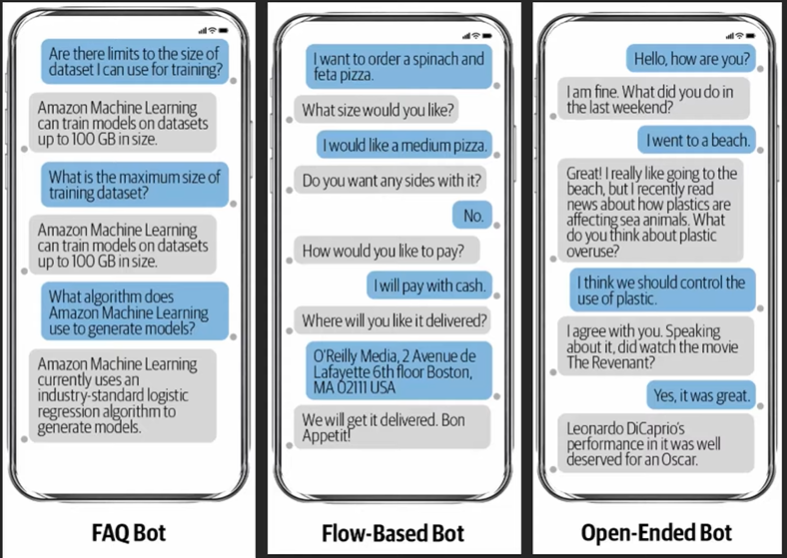

### Machine Translation Task
- Google Translator: using RNN

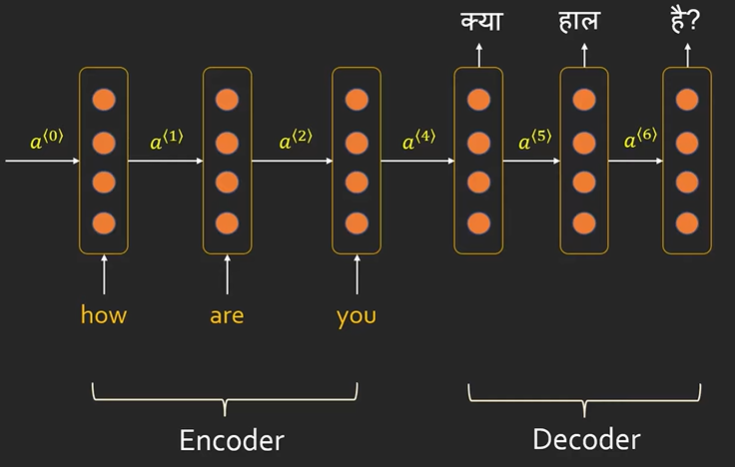

### Language Modeling Task
- Statistical Model
- Neural Model

Ex: Email auto-complete sentence: try to predict the next word

### NLP Pipeline
- **Data Acquisition:** It is the first step in NLP pipeline. The idea is to get necessary data required to solve the given NLP problem
- **Text Extraction and Cleanup:** (discard irrelevant information, spelling correction, remove extra space and \n)
- **Pre-Processing:**
    - **Sentence Segmentation or Tokenization:** Tokenization is a process of splitting text into meaningful segments. Split long text into multiple sentences called as **"Sentence tokenization"** and then split each sentence into words called as **"word tokenization**
    - **Stemming:** Using some fix rules without grammer, try to come-up with base word like eating -> eat, loves -> love
    - **Lemmatization:** Mapping of word with it's base word using grammer like ate -> eat

    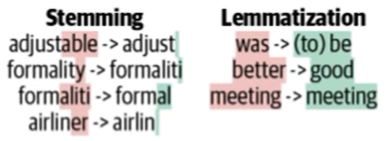
- **Feature Engineering:** As machine learning model do not understand text, they ask for numbers so we need to convert the word to some meaningful numbers
    - TF-IDF Vecctorizer
    - One Hot Encoding
    - Word Embedding
- **Model Building:** Trial and error to comeup with best model for your usecase. To choose best model use **GridSearchCV** technique. Using different machine learning model for classification such as Naive Bayes Classifier, SVM, Random Forest
- **Evaluation:** Using matrixs like Confusion, Precision, Recall, F1 Score
    - In Confusion Matrix, in x-axis will have truth and in y-axis will have prediction, so anything on diagonal will be correct ones and rest are wrong prediction by the model
    - Until will find the best mmodel, will go in loop to evaluation -> pre-processing -> feature engineering -> model building -> evaluation

    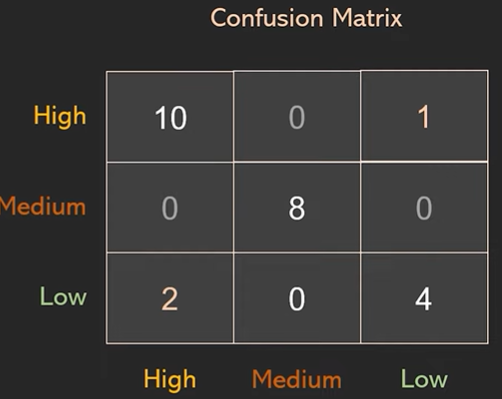
- **Deployment**
- **Monitor and Update**

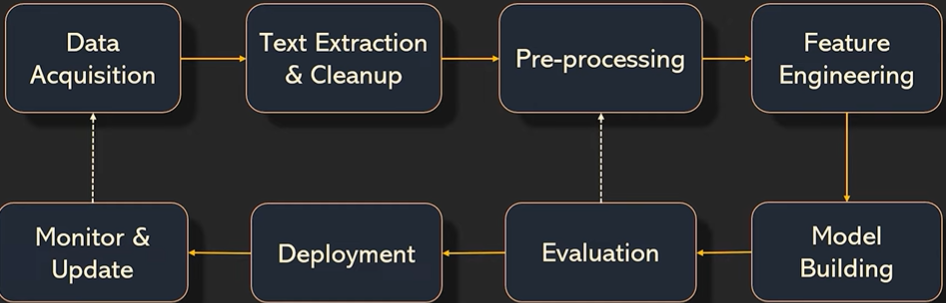

### SpaCy vs NLTK
- SpaCy is object-oriented whereas NLTK is string processing library
- Download:
    - pip install spacy
    - python -m spacy download en
- SpaCy provides most efficient NLP algorithm for a given task. Hence if you care about the end result, go with SpaCy whereas NLTK provides access to many algorithms. If you care about specific algo and customizations go with NLTK
- SpaCy is user friendly whereas NLTK is also user friendly but probably less compared to SpaCy
- SpaCy is new library and has a very active user community whereas NLTK is old library

### Tokenization in SpaCy
- spacy.blank('en'): means will have blank pipeline and we can add any component to pipeline manually.
    - 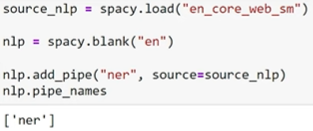
    - nlp.add_pipe('sentencizer')
    - nlp.pipe_names

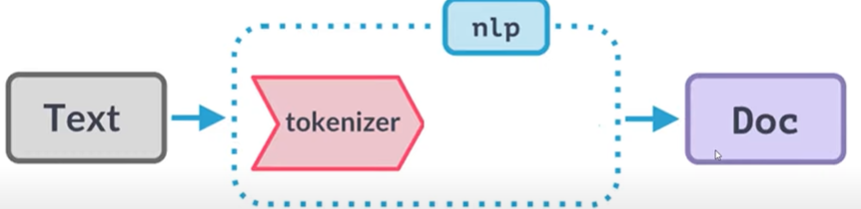
- spacy.load('en_core_web_sm')
    - tagger, parser, ner all comes under **"Language Processing Pipeline"**
    - 'en_core_web_sm' is a pre-trained pipeline for english

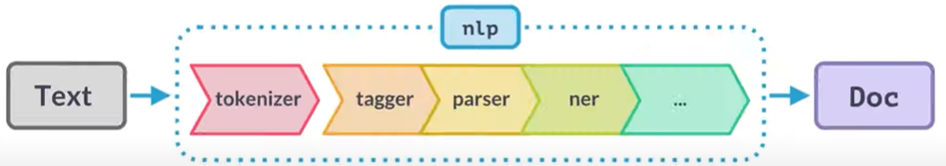

In [ ]:
import spacy

# nlp=spacy.blank('en')
nlp=spacy.load("en_core_web_sm")

# here creating an object
doc=nlp("Dr. Strange loves pav bhaji of mumbai. Hulk ate chaat of delhi at 20 $")

In [ ]:
print(nlp.pipe_names)

for token in doc:
    print(token," | ", token.pos_, " | ", token.lemma_)

for ent in doc.ents:
    print(ent," - ", ent.label_," - ",spacy.explain(ent.label_))

In [ ]:
# to display entity in better way
from spacy import displacy

displacy.render(doc,style='ent')

In [ ]:
type(nlp)

In [ ]:
var0=doc[1]
var0

In [ ]:
type(var0)

In [ ]:
# dir() will provide all the attribute of that variable
dir(var0)

In [ ]:
var0.is_alpha

In [ ]:
var0.like_num

"Tony gave two $ to Peter."

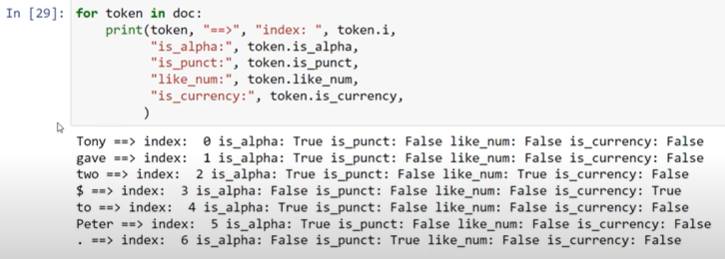

In [ ]:
# Sentence Tokenization
for sentence in doc.sents:
    print(sentence)

In [ ]:
# Word Tokenization
for sentence in doc.sents:
    for word in sentence:
        print(word)

### Usecase: extracting students email id from a text file using spaCy

In [ ]:
# reading the student_info.txt file
with open('student_info.txt') as f:
    text=f.readlines()

text=' '.join(text)
print(text)

In [ ]:
doc=nlp(text)

emails=[]
for token in doc:
    if token.like_email:
        emails.append(token)

print(emails)

### Usecase: Hindi language tokenization in spacy

In [ ]:
nlp=spacy.blank('hi')

doc=nlp("भैया ! मेरे 5000 ₹ दे दो")

for token in doc:
    print(token, token.is_currency, token.like_num)

### Usecase: Customizing tokenization rules
- it will split the word but can't modify the word 
- ex: "gimme" means "give me" which is modification and this can't be done here. It will be like "gimme" to "gim me"

In [ ]:
# before customizing the rules
doc=nlp("gimme double cheese extra large pizza")

tokens=[token for token in doc]
print(tokens)

In [ ]:
# after customizing the tokenization rules
from spacy.symbols import ORTH

nlp.tokenizer.add_special_case("gimme",[
    {ORTH: "gim"},
    {ORTH: "me"}
])

doc=nlp("gimme double cheese extra large pizza")

tokens=[token for token in doc]
print(tokens)

### Exercise-1

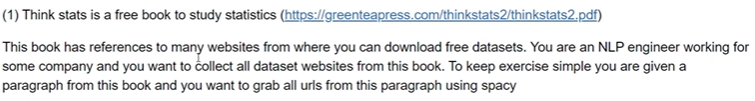

In [ ]:
with open("think_stats.txt") as f:
    text=f.readlines()
data=''
for txt in text:
    data+=txt
data

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(data)
email=[]
for token in doc:
    if token.like_url:
        email.append(token)
print(email)

### Exercise-2



In [ ]:
transactions='Tony gave two $ to Peter, Bruce gave 500 € to Steve'

doc=nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token.text, doc[token.i+1].text)

### Tokenization in NLTK

In [ ]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

print(sent_tokenize("Dr. Strange loves pav bhaji of mumbai. Hulk loves chaat of delhi"))
print(word_tokenize("Dr. Strange loves pav bhaji of mumbai. Hulk loves chaat of delhi"))

there is a very slight difference in wordpunct_tokenize, word_tokenize, TreebankWordTokenizer. Check the output for each to understand

In [ ]:
from nltk.tokenize import wordpunct_tokenize

print(wordpunct_tokenize("it's different from word_tokenize as it will treat every puncutaion as separate character even 's"))

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

tokenize=TreebankWordTokenizer()

tokenize.tokenize("it will not treat. as a separate character when . comes in middle only consider . as separate when comes at last .")

### Stemming
Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a "Lemma".

Use fixed rules or dump rules such as remove 'able','ing' etc. to derive a base word

In nltk, different type of stemming technique:
- **PorterStemmer**
- **RegexpStemmer:** With the help of this class we can easily implement Regular Expression Stemmer alorithms. It basically takes a single regular expression and removes any prefix or suffix that matches the expression.
- **SnowballStemmer:** It performs better than PorterStemmer

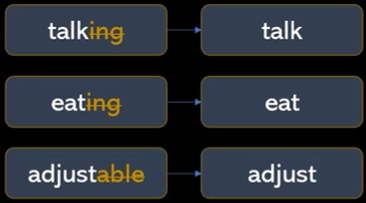

### Lemmatization
Need knowledge of a language (a.k.a. linguistic knowledge) to derive a base word (base word = lemma)

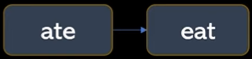

**NOTE: spaCy doesn't support Stemming, it only support Lemmatization while NLTK supports both.**

In [ ]:
# stemming using nltk
from nltk.stem import PorterStemmer, RegexpStemmer, SnowballStemmer

# creating object of class
stemmer=PorterStemmer()
reg_stemmer=RegexpStemmer(regexp='ing$|s$|e$|able$')
snowball_stemmer=SnowballStemmer('english')

In [ ]:
words=['eating', 'eats', 'eat', 'ate', 'adjustable', 'rafting', 'crafting', 'ability', 'metting','fairly','sportingly']

for word in words:
    print(word," -Poster- ",stemmer.stem(word))
    print(word," -Regexp- ",reg_stemmer.stem(word))
    print(word," -Snowball- ",snowball_stemmer.stem(word))

In [ ]:
# lemmatization in spacy
import spacy
nlp=spacy.load('en_core_web_sm')

doc=nlp('eating eats eat ate adjustable meeting rafting crafting better ability')

# here token.lemma will give unique hash value for each base word
for token in doc:
    print(token," - ",token.lemma_," - ",token.lemma)

### Customzing the lemmatization in spaCy

In [ ]:
# before customization
print(nlp.pipe_names)
doc=nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")

# it doesn't understand that bro, brah means brother
for token in doc:
    print(token,' - ',token.lemma_)

In [ ]:
# customizing the lemmatization to understand the slang
ar=nlp.get_pipe('attribute_ruler')

# adding the text to lemma
ar.add(
    [
        [{"TEXT":"Bro"}], 
        [{"TEXT":"Brah"}]
    ], 
    {"LEMMA": "Brother"}
    )

In [ ]:
# after customization
print(nlp.pipe_names)
doc=nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")

# now it will know that bro, brah means brother
for token in doc:
    print(token,' - ',token.lemma_)

### POS - Part of Speech Tagging in spaCy
There are total 8+ part of speech in English

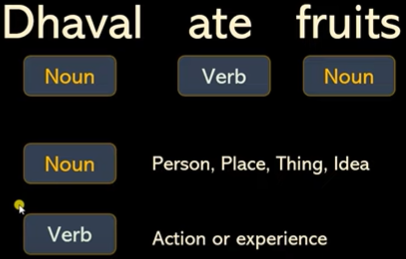

In [ ]:
doc=nlp("Wow! Elon flew to mars yesterday. He carried biryani masala with him quits quit")

for token in doc:
    print(token," - ",token.pos_," - ",spacy.explain(token.pos_)," - ",token.tag_," - ",spacy.explain(token.tag_))

### Usecase: Remove unnecessary token from Microsoft earning report

In [ ]:
earning_text="""
Microsoft Corp. today announced the following results for the quarter ended March 31, 2024, as compared to the corresponding period of last fiscal year:

·        Revenue was $61.9 billion and increased 17%
·        Operating income was $27.6 billion and increased 23%
·        Net income was $21.9 billion and increased 20%
·        Diluted earnings per share was $2.94 and increased 20%

“Microsoft Copilot and Copilot stack are orchestrating etc a new era of AI transformation, driving better business outcomes across every role and industry," said Satya Nadella, chairman and chief executive officer of Microsoft.

“This quarter Microsoft Cloud revenue was $35.1 billion, up 23% year-over-year, driven by strong execution by our sales teams and partners,” said Amy Hood, executive vice president and chief financial officer of Microsoft.
"""

doc=nlp(earning_text)

filtered_tokens=[]
for token in doc:
    if token.pos_ not in ["SPACE", 'X', 'PUNCT']:
        filtered_tokens.append(token)
print(filtered_tokens)

In [ ]:
# count of each part of speech
count=doc.count_by(spacy.attrs.POS)

for k,v in count.items():
    print(doc.vocab[k].text," | ",v)

### Exercise-1

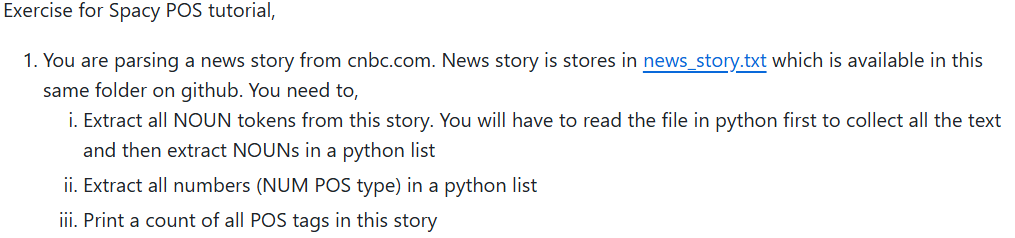

In [ ]:
# getting text from txt file
with open("news_story.txt") as f:
    text=f.read()

In [ ]:
doc=nlp(text)

# (i)
nouns=[]
for token in doc:
    if token.pos_ == 'NOUN':
        nouns.append(token)
print(nouns)

In [ ]:
# (ii)
numbers=[]
for token in doc:
    if token.pos_ == 'NUM':
        numbers.append(token)
print(numbers)

In [ ]:
# (iii)
count=doc.count_by(spacy.attrs.POS)
for k,v in count.items():
    print(doc.vocab[k].text," | ",v)

### NER - Name Entity Recognization
https://huggingface.co/dslim/bert-base-NER

USECASES:
- Search
- Recommendations
- Customer Care Service

In [ ]:
# ner in spacy
print(nlp.pipe_names)
doc=nlp("Tesla Inc is going to acquire Twitter for $45 billion. Michael Bloomberg founded Bloomberg in 1982")

for ent in doc.ents:
    print(ent," - ",ent.label_," - ",spacy.explain(ent.label_))

In [ ]:
# all the entity that spacy supports
nlp.pipe_labels['ner']

### Customizing NER

In [ ]:
type(doc[2:5])

In [ ]:
from spacy.tokens import Span

s2=Span(doc, 6, 7, label='ORG')

doc.set_ents([s2], default='unmodified')

In [ ]:
for ent in doc.ents:
    print(ent," - ",ent.label_," - ",spacy.explain(ent.label_))

### Build a NER system
Approaches:
- Simple Lookup
- Rule Based NER using pos_ or regex: https://ner.pythonhumanities.com/02_01_spaCy_Entity_Ruler.html#introducing-complex-rules-and-variance-to-the-entityruler-advanced

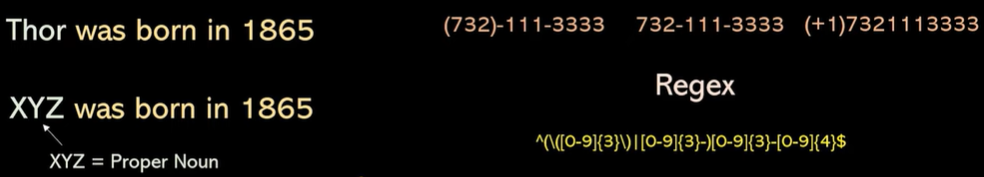

- Machine Learning: CRF or BERT

In [ ]:
#Import the requisite library
import spacy

#Sample text
text = "This is a sample number (555) 555-5555."

#Build upon the spaCy Small Model
nlp = spacy.blank("en")

#Create the Ruler and Add it
ruler = nlp.add_pipe("entity_ruler")

#List of Entities and Patterns (source: https://spacy.io/usage/rule-based-matching)
patterns = [
                {"label": "PHONE_NUMBER", "pattern": [{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "ddd"},
                {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]}
            ]
#add patterns to ruler
ruler.add_patterns(patterns)

doc = nlp(text)

for ent in doc.ents:
    print (ent.text, ent.label_)

### Feature Engineering - Text Representation
Feature Engineering is a process of extracting features from raw data. In NLP, we also call it as Text Representation. Reprrsenting text as a vector is also known as Vector Space Model.

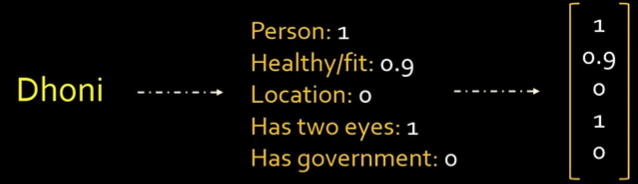

Approches of converting text into vectors:
- Label Encoding
- One Hot Encoding
- Bag Of Words
- Bag Of n-grams
- TF-IDF
- Word Embeddings

Often in NLP, feeding a good text representation to an ordinary algorithm will get you much farther compared to applying a top-notch algorithm to an ordinary text representation.

### Label Encoding
- Create a vocabulary using the dataset suppose all the mails by applying stemming, lemmatization, tokenization to create a vocabulary.
- then assign each word in the vocabulary a number
- and then use those assigned numbers to convert the actual mails into vector space

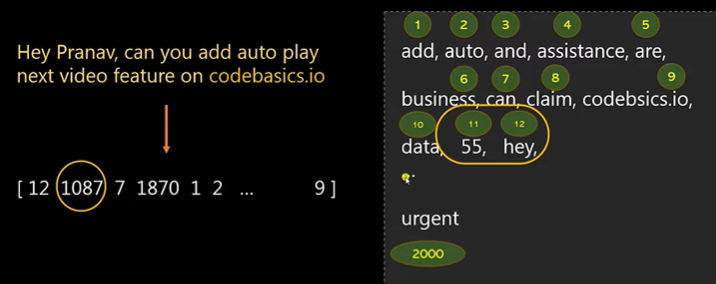

### One Hot Encoding
- Create a vocabulary using the dataset suppose all the mails by applying stemming, lemmatization, tokenization to create a vocabulary.
- put the vocabulary words and actual mail words in table form and where each word meets, put one else all zero.

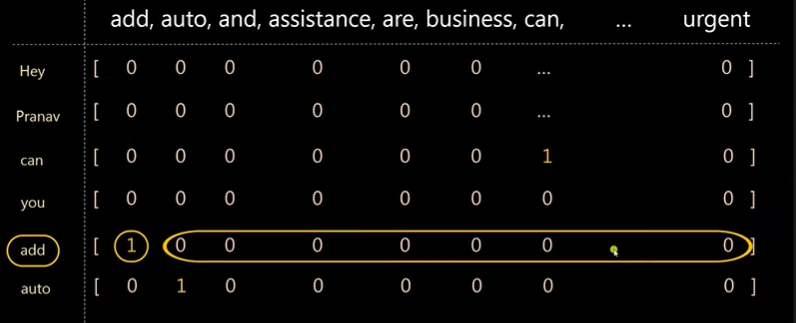


#### NOTE: In NLP, we don't use these approaches (Label Encoding, One Hot Encoding) as they are having certain disadvantages-
- One hot encoding doesn't capture the meaning of the word in an accurate way. Similar words do not have similar representation like help and assistance

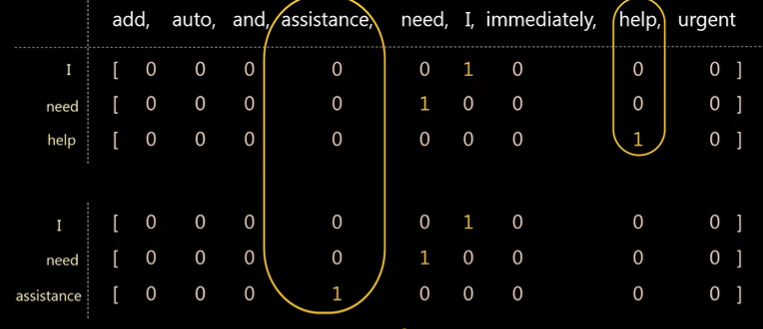

- Consumes too much memory and compute resources

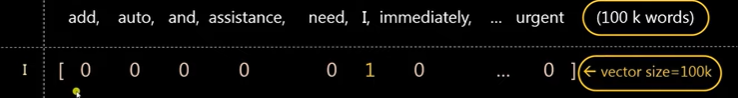

- Out of Vocabulary (OOV) problem

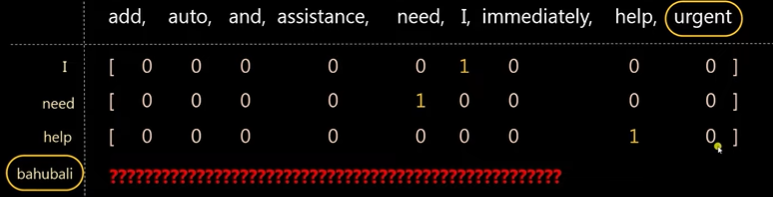

- One hot encoding can't give fixed size of vector but for machine learning training we need same size of vectors. No fixed length representation

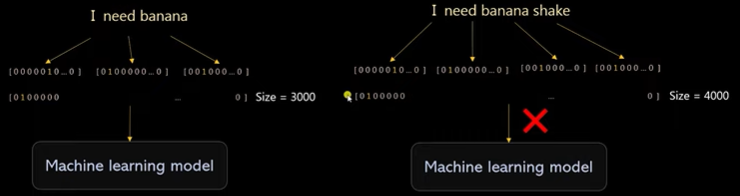

### Bag Of Words (BOW)
- Suppose we have web scrapped so many news articles now we want to categorize them based on company
- So first will auto exact the company names from the scrapped dataset to create a vocabulary
- then for each articles will have to do a word count

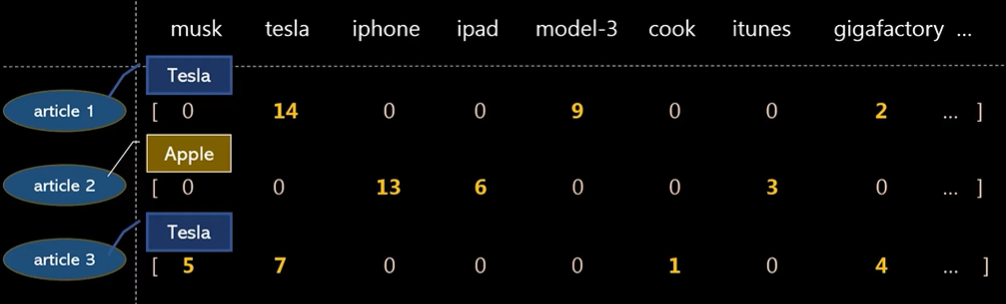

Limitation: 
- Requires lot of memory but still less than One Hot Encoding. Both One Hot Encoding and Bag Of Words create **Sparse Representation** means vector will contain more zeros and this will consume too much memory and resources
- Doesn't capture meaning of words properly

### Usecase: filtering spam mails using Bag Of Words

In [ ]:
import pandas as pd

# reading csv file to get the dataset
df=pd.read_csv('spam.csv')
df.head()

In [ ]:
# counting the total no. of each category
count=df['Category'].value_counts()
count

In [ ]:
df.shape

In [ ]:
# adding a column named 'spam' and storing number
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

In [ ]:
# dividing the dataset into train and test dataset
from sklearn.model_selection import train_test_split

# here x is message and y is spam column
# x is dependent and y is independent
# here test_size=0.2 means 20% of complete dataset will become test dataset and rest 80% will be train dataset
X_train, X_test, y_train, y_test= train_test_split(df['Message'],df['spam'],test_size=0.2)

In [ ]:
print(X_train.shape, X_test.shape)

In [ ]:
type(X_train)

In [ ]:
X_train[:4]

In [ ]:
# using Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer()

# creating Bag Of Words vocabulary
# here X_train.values is numpy.narray
x_train_cv=v.fit_transform(X_train.values)
x_train_cv

In [ ]:
# converting sparse martix to array
x_train_np=x_train_cv.toarray()

In [ ]:
x_train_cv.shape

In [ ]:
# getting the vocabulary
v.get_feature_names_out()[1000:1050]

In [ ]:
# length of vocabulary
v.get_feature_names_out().shape

In [ ]:
v.vocabulary_

In [ ]:
x_train_np[0]

In [ ]:
# getting index where value is non-zero
import numpy as np
np.where(x_train_np[0]!=0)

In [ ]:
x_train_np[0][7719]

In [ ]:
v.get_feature_names_out()[7719]

In [ ]:
# training and test dataset are ready
# now going to create machine learning model using Navie Bayes
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
# traing the ml model with train dataset
model.fit(x_train_cv,y_train)

In [ ]:
x_test_cv=v.transform(X_test)
x_test_cv

In [ ]:
# our spam and non-spam class was imbalance that's why we have used classification_report
from sklearn.metrics import classification_report

y_pred=model.predict(x_test_cv)

print(classification_report(y_test,y_pred))

In [ ]:
# testing
emails=[
    'Hey mohan, can we get together to watch football game today?',
    'Upto 20% discount on parking. Dont miss this reward!',
    'Let meet the complete team at 12pm '
]

email_cv=v.transform(emails)
model.predict(email_cv)
# clearly 1st and 3rd are ham and 2nd is spam mail

#### there is a simple way of doing all the above steps by using sklearn.pipeline

In [ ]:
from sklearn.pipeline import Pipeline

clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
# training the ml model
clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

### Exercise-1 Using Bag Of Words

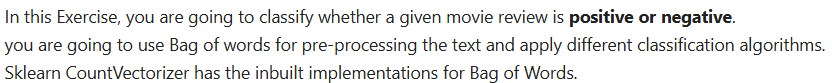

In [ ]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")
df.head()

In [ ]:
df['result']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df['review'],df['result'],test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

### Stop Words in NLP
There are certain usecase where we prefer to remove the stop words in pre-processing stage itself while  in some cases we don't want to remove the stop words.

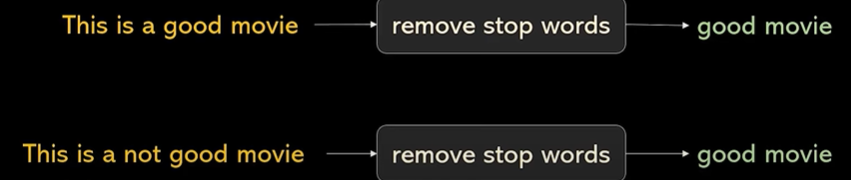

When should I not remove stop words:
- Chatbot, QnA system
- Language Translation
- Any case where valuable information is lost

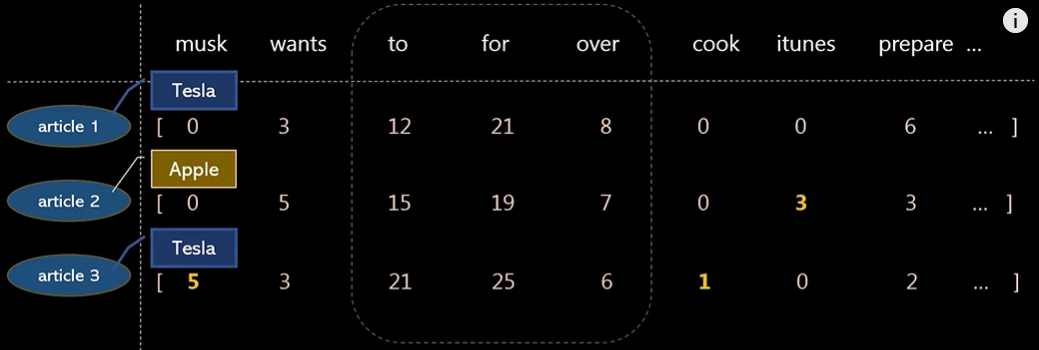

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

len(STOP_WORDS)

In [ ]:
nlp=spacy.load('en_core_web_sm')

doc=nlp("We just opened our wings, the flying part is coming soon")

In [ ]:
for token in doc:
    if token.is_stop:
        print(token)

### Exercise-1 Remove 'not' from stop words list of spaCy

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

def preprocess(text):
    doc=nlp(text)
    no_stop_words=[token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)

In [ ]:
# remove the stop word 'noy from spacy
nlp.vocab['not'].is_stop=False

In [ ]:
p_text="this is a good movie"
n_text="this is not a good movie"

print("positive: ",preprocess(p_text))
print("negative: ",preprocess(n_text))

### Exercise-2 Most frequently used token after removing stop words and punctuations

In [ ]:
text= ''' The India men's national cricket team, also known as Team India or the Men in Blue, represents India in men's international cricket.
It is governed by the Board of Control for Cricket in India (BCCI), and is a Full Member of the International Cricket Council (ICC) with Test,
One Day International (ODI) and Twenty20 International (T20I) status. Cricket was introduced to India by British sailors in the 18th century, and the 
first cricket club was established in 1792. India's national cricket team played its first Test match on 25 June 1932 at Lord's, becoming the sixth team to be
granted test cricket status.
'''

In [ ]:
doc=nlp(text)

token_text=[]
for token in doc:
    if token.is_stop or token.is_punct:
        continue
    token_text.append(token.text)
token_text

In [ ]:
freq_token={}
for token in token_text:
    if token!='\n' and token!=' ':
        if token not in freq_token:
            freq_token[token]=1
        else:
            freq_token[token]+=1

In [ ]:
max_freq_token=max(freq_token.keys(),key=(lambda key: freq_token[key]))
max_freq_token

### Bag Of n-grams
- Meaning of a sentence is determined by order of words.
- so instead of capturing individual words in vocabulary, will capture pair of words upto n-grams
- basically, Bag Of Words is special case of Bag Of n-grams where the value of n is one 

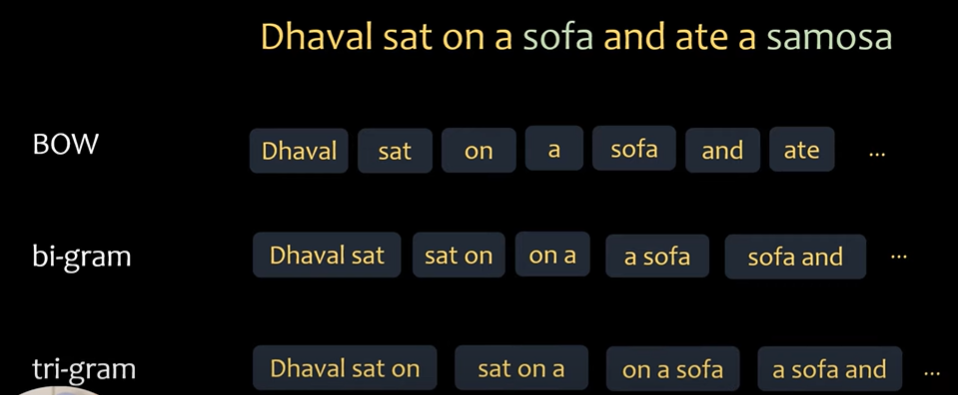

- we can even use Bag Of Words and Bag Of n-grams together to get more accurate resukts in some cases

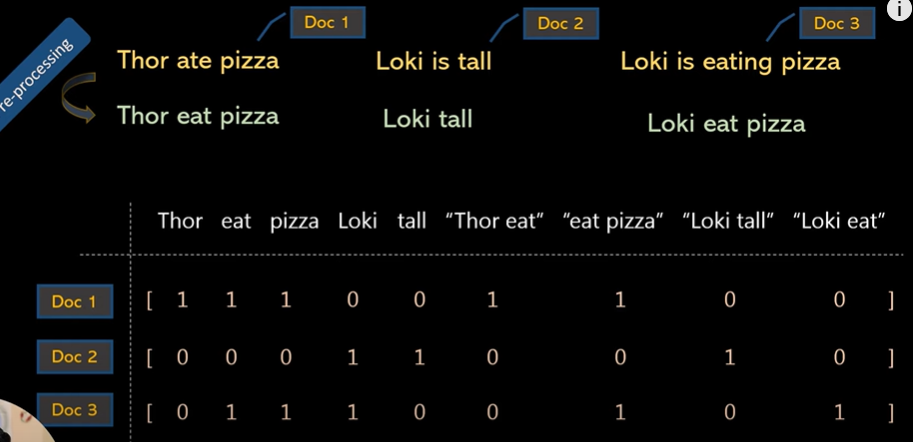

Limitations:
- As n increased, dimensionality, sparsity increases
- Doesn't address out of vocabulary (OOV) problem

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# by default ngram_range=(1,1) which means bag of words
v=CountVectorizer()
v.fit(['Thor hathodawal is looking for job'])
print(v.vocabulary_)

In [ ]:
# ngram_range=(2,2) means bi-grams
v=CountVectorizer(ngram_range=(2,2))
v.fit(['Thor hathodawal is looking for job'])
print(v.vocabulary_)

In [ ]:
# ngram_range=(1,2) means both unigram and bigram
v=CountVectorizer(ngram_range=(1,2))
v.fit(['Thor hathodawal is looking for job'])
print(v.vocabulary_)

In [ ]:
# ngram_range=(1,3) means unigram, bigram, and trigram
v=CountVectorizer(ngram_range=(1,3))
v.fit(['Thor hathodawal is looking for job'])
print(v.vocabulary_)

In [ ]:
# we need to convert the text into number to pass in machine learning model
v.transform(['thor job is looking great']).toarray()

### Exercise-1 News Categories using Bag Of n-grams

In [ ]:
import pandas as pd

df=pd.read_json('news_dataset.json')
df.head()

In [ ]:
# checking category count
df.category.value_counts()

#### as we can see the dataset is imbalance, so it will be good if we make it balance and to do so there are few techniques, here we are using mmost simplest technique called undersampling to make the dataset balanced

In [ ]:
# undersampling means making all of them of minimum size 
# here in our case min=1381
min_samples=1381

# whenevr we provide same random_state value it will get same min_samples dataset
# if you want to change the dataset the cahnge the random_state value and this value could be any value 
df_business=df[df.category=='BUSINESS'].sample(min_samples, random_state=2024)
df_sports=df[df.category=='SPORTS'].sample(min_samples, random_state=2024)
df_crime=df[df.category=='CRIME'].sample(min_samples, random_state=2024)
df_science=df[df.category=='SCIENCE'].sample(min_samples, random_state=2024)

In [ ]:
# to add all dataset row by row, provide axis=0
df_balance=pd.concat([df_business,df_sports,df_crime,df_science], axis=0)
df_balance.category.value_counts()

In [ ]:
# as we can't pass text to ml model so converting into numbers based on category
df_balance['category_num']=df_balance.category.map(
    {'BUSINESS':0,
     'SPORTS':1,
     'CRIME':2,
     'SCIENCE':3}
)
df_balance.head()

#### NOTE: if we first do preprocessing of text and then use that text instead of raw text, it will increase the performation of our model

In [ ]:
from sklearn.model_selection import train_test_split

# stratify will make sure that in the train test dataset of category will be equal
X_train,X_test,y_train,y_test=train_test_split(
    df_balance.text,
    df_balance.category_num,
    test_size=0.2,
    random_state=2024,
    stratify=df_balance.category_num
    )

In [ ]:
print(X_train.shape)
X_train.head()

In [ ]:
# this all are equal beacuse we have used stratify
y_train.value_counts()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# bag of words
clf=Pipeline([
    ('CountVectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# bag of n-grams
clf=Pipeline([
    ('CountVectorizer',CountVectorizer(ngram_range=(1,2))),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
from matplotlib import pyplot as plt 
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Exercise-2 Fake or Real news

In [ ]:
import pandas as pd

df=pd.read_csv('Fake_Real_Data.csv')
df.head()

In [ ]:
df.label.value_counts()

In [ ]:
df['label_num']=df.label.apply(lambda x: 1 if x=='Real' else 0)
df.head()

In [ ]:
# without preprocessing the text
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    stratify=df.label_num
)

In [ ]:
print(X_train.shape)
X_train.head()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
# after doing preprocessing of text
import spacy
nlp=spacy.load('en_core_web_sm')
def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

df['processed_text']=df.Text.apply(preprocess)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.processed_text,
    df.label_num,
    stratify=df.label_num
)

print(X_train.shape)
X_train.head()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

### TF-IDF (Term Frequency - Inverse Document Frequeny)
- Document Frequency (DF) = Number of times term t is present in all docs
- and if some term t appearing in majority of docs then we should lower it's influence and if term t appears less then give that term t high score

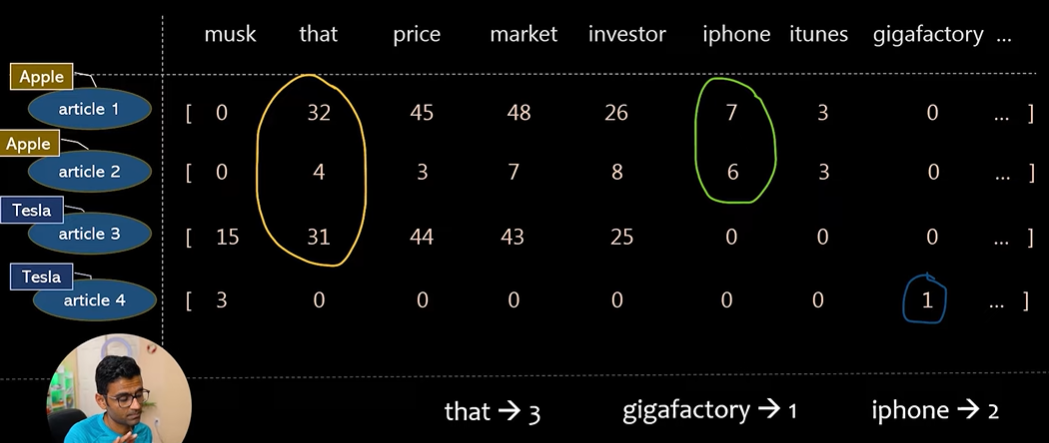

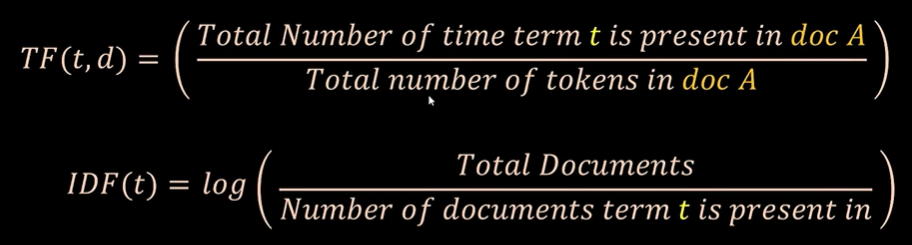

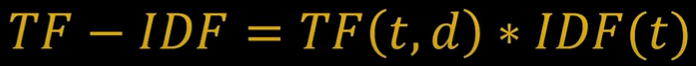

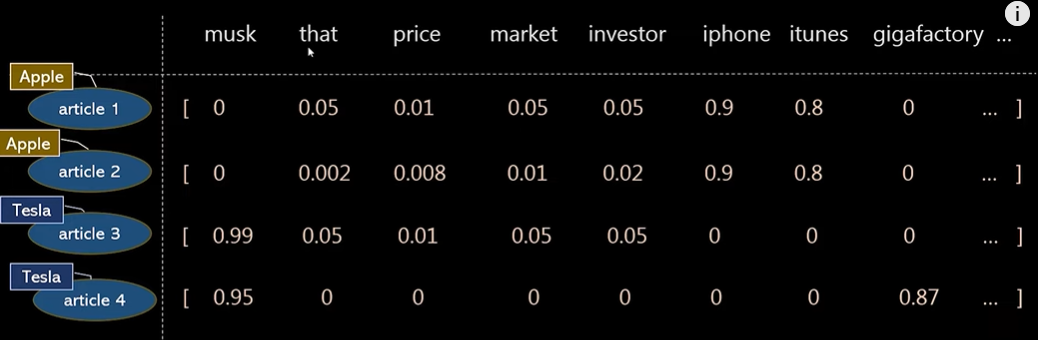


Sklearn formula for td-ifd

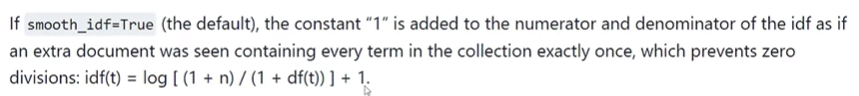

Why we use log in IDF formula

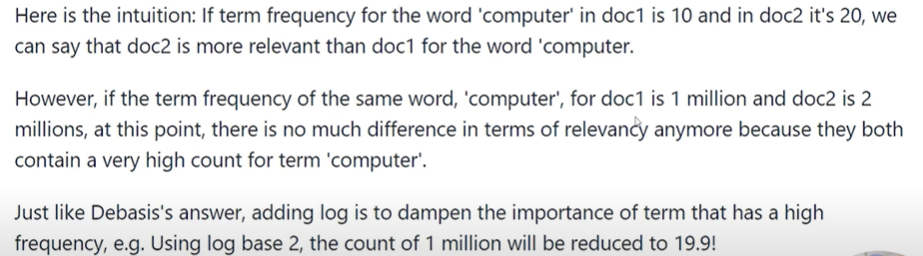

Limitions:
- As n increased, dimensionality, sparsity increases
- Doesn't capture relationship between words
- doesn't address out of vocabulary (OOV) problem

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=[
    'Thor eating pizza, loki is eating pizza, Tronman ate pizza already',
    'Apple is announcing new iphone tomorrow',
    'Tesla is announcing new model-3 tomorrow',
    'Google is announcing new pixel-3 tomorrow',
    'Microsoft is announcing new surface tomorrow',
    'Amazon is announcing new eco-dot tomorrow',
    'I am eating biryani and you are eating grapes',
    'something is amazing',
]

In [ ]:
v=TfidfVectorizer()
transformed_output=v.fit_transform(corpus)
print(v.vocabulary_)

In [ ]:
all_features_name=v.get_feature_names_out()
all_features_name

In [ ]:
for word in all_features_name:
    indx=v.vocabulary_.get(word)
    print(f"{word} - {v.idf_[indx]}")

In [ ]:
corpus[:2]

In [ ]:
transformed_output.toarray()[:2]

### Exercise-1 Ecommerce Category

In [ ]:
import pandas as pd

df=pd.read_csv('Ecommerce_data.csv')
df.head()

In [ ]:
df.label.value_counts()

In [ ]:
df['label_num']=df['label'].map(
    {
        'Household':0,
        'Books':1,
        'Electronics':2,
        'Clothing & Accessories':3,
    }
)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=2024,
    stratify=df.label_num
)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# using new classifier here instead of naive bayes
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('KNN',KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
# using random forest classifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('nb',RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
# using navie bayes
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
X_test[:5]

In [ ]:
y_test[:5]

In [ ]:
y_pred[:5]

### Exercise-2 

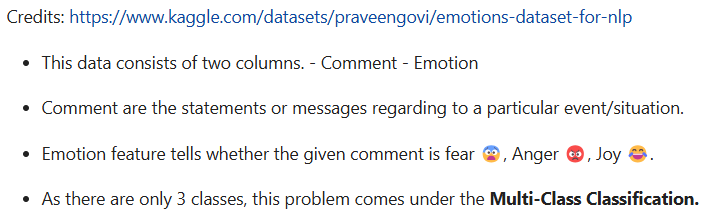

In [ ]:
import pandas as pd

df=pd.read_csv('Emotion_classify_Data.csv')
df.head()

In [ ]:
df.Emotion.value_counts()

In [ ]:
df['emotion_num']=df['Emotion'].map({
    'joy':0,
    'fear':1,
    'anger':2
})
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.Comment,
    df.emotion_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.emotion_num
)

print(X_train.shape)
print(X_test.shape)

In [ ]:
# using CountVectorizer with only trigrams.
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(3,3))),
    ('random_forest',RandomForestClassifier())
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
# using TF-IDF vectorizer for pre-processing the text.
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

clf=Pipeline([
    ('vectorizer',TfidfVectorizer()),
    ('random_forest',RandomForestClassifier())
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

### Word Embeddings
- We had some limitation in Bag Of Words and TF-IDF, so word embeddings try to address these shortcoming
- Similar words have similar vectors
- Dimensions are low like 300 or less
- Contains less zeros

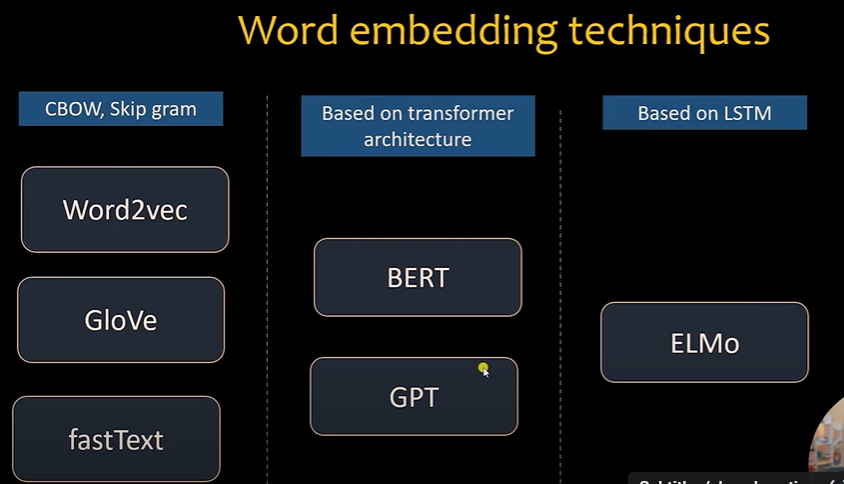

Word Embedding Techniques:
- These are the techniques which are build on different approaches and the common technique that we use to build these below word embeddings is using "continuous bag of words (CBOW)" and "skip gram"
    - Word2vec: cam perform arithmetic operation over text. Ex: king - man + woman = queen
    - GloVe 
    - fastText
- Based on transformer architecture
    - BERT
    - GPT
- Based on LSTM
    - ELMo

#### Variations based on dataset that they are trained on

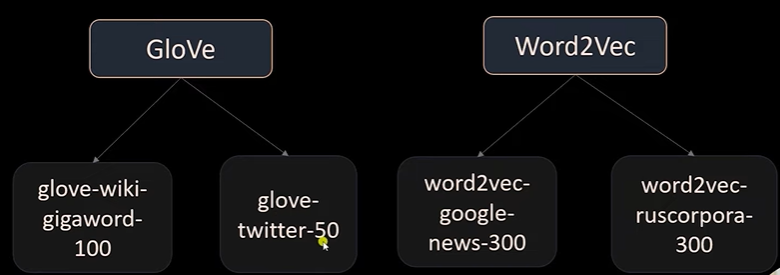

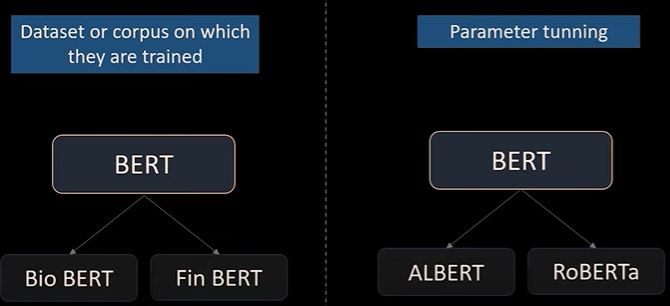

NOTE: word embeddings occupy lot of space. hence, en_core_web_sm model do not have them included.
- en_core_web_sm: 
- en_core_web_md: 
- en_core_web_lg: 

In [ ]:
import spacy
nlp=spacy.load('en_core_web_md')

doc=nlp("dog cat banana deiuhceu srishti")

for token in doc:
    print(token.text, "Vector: ",token.has_vector, "OOV: ",token.is_oov)

In [ ]:
# size of vector of dog word
print("sentence vector: ",doc.vector.shape)
print("word vector: ",doc[0].vector.shape)
# both are same as sentence vector will take the average of the word vectors
# the max size of word vector is 300

similarity between words here similarity means wheather two words appears in same context or not

In [ ]:
base_token=nlp("bread")
base_token[0].vector.shape

In [ ]:
doc=nlp('bread sandwich burger car tiger human wheat')

for token in doc:
    print(f"{token.text} - {base_token[0].text}: {token.similarity(base_token[0])}")

cosine_similarity

In [ ]:
king=nlp.vocab['king'].vector
man=nlp.vocab['man'].vector
woman=nlp.vocab['woman'].vector
queen=nlp.vocab['queen'].vector

result=king-man+woman

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([result],[queen])

### Exericse-1 Spacy word vectors for real fake news

In [ ]:
import pandas as pd

df=pd.read_csv("Fake_Real_Data.csv")
df.head()

In [ ]:
df['label_num']=df['label'].map({
    'Real':1,
    'Fake':1
})
df.head()

In [ ]:
# storing vectors in new column
import spacy
nlp=spacy.load("en_core_web_md")
doc=nlp("top trump surrogates Stabs hii")
doc.vector.shape

creating glove embeddings

In [ ]:
df['text_vector']=df['Text'].apply(lambda x: nlp(x).vector)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.text_vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [ ]:
import numpy as np

print("X_train: ",X_train)
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)
print("X_train_2d: ",X_train_2d)

negative values are not accepted in MultinomialNB, so to remove negative values we do scaling which will help to convert those negative values in positive range

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_train_embed=scaler.fit_transform(X_train_2d)
scaled_test_embed=scaler.fit_transform(X_test_2d)

clf=MultinomialNB()
clf.fit(scaled_train_embed,y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred= clf.predict(scaled_test_embed)

print(classification_report(y_test,y_pred))

### Gensim
- Gensim is a NLP Library similar to Spacy but it is mainly used for topic modeling
- when comes to word vectors, the Gensim API is more convenient
- https://github.com/piskvorky/gensim-data?tab=readme-ov-file#available-data

In [ ]:
import gensim.downloader as api

wv=api.load('word2vec-google-news-300')

In [ ]:
# getting the word vector by just doing
wv_good=wv['good']
wv_good.shape

In [ ]:
# getting the vector for a sentence
# as we know the sentence vector is basically the average of all the word vector
# by default, pre_normalize=True
wv.get_mean_vector(['worry','understand'], pre_normalize=False)[:3]

In [ ]:
# similarity is not based on synonyms, but based on context 
print(wv.similarity(w1='great',w2='good'))
print(wv.similarity(w1='great',w2='well'))
print(wv.similarity(w1='great',w2='better'))
print(wv.similarity(w1='great',w2='nice'))
print(wv.similarity(w1='good',w2='bad'))

In [ ]:
# it will give the list of mose similar words to provided word
wv.most_similar('good')

mathematics operation in gensim are easy to perform

In [ ]:
wv.most_similar(positive=['france','berlin'], negative=['paris'])

In [ ]:
wv.most_similar(positive=['king','woman'], negative=['man'])

In [ ]:
# to get the odd word
wv.doesnt_match(['dog','cat','lion','microsoft'])

same exercise fake real news predict we can do with gensim also in same way as we did in spacy glove word embeddings

### fastText - word embedding technique
- fastText is a technique similar to word2vec as well as a library
- fastText can handle OOV (out of vocabulary) better than word2vec
- fastText is often a first choice when you want to train custom word embeddings for your domain

NOTE: we need to download pre-trained models based on our usecase, go to https://fasttext.cc/docs/en/crawl-vectors.html#models and download the bin file of whatever model language you want, it will download the zip file so will need to unzip the file using command prompt

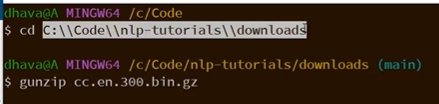

In [ ]:
import fasttext

model_en=fasttext.load_model('path of the model you downloaded')

In [ ]:
# similar to most_similar() in gensim
model_en.get_nearest_neighbors('good')

In [ ]:
# similar to getting word vector in gensim by doing wv['good']
model_en.get_word_vector('good')
# size of vector will be same 300

In [ ]:
# it will understand the relationship between first two words and then try to find the word having same relation with the third word
model_en.get_analogies('berlin','germany','india')
# here germany is berlin's capital so it will give the capital of india i.e., delhi
model_en.get_analogies('driving','car','phone')
# car is used for driving then phone is used for texting, phone-calling

### Generate word embeddings for Indian food recipes

In [ ]:
import pandas as pd

df=pd.read_csv('Cleaned_Indian_Food_Dataset.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.TranslatedInstructions[0]

In [ ]:
# removing new line and special characters
import re
def preprocess(text):
    text=re.sub(r'[^\w\s]',' ',text)
    text=re.sub(r'[ \n]+]',' ',text)
    return text.strip().lower()

In [ ]:
df.TranslatedInstructions=df.TranslatedInstructions.map(preprocess)

In [ ]:
df.TranslatedInstructions[0]

for fasttext, we need to have a specific format file to train the model

In [ ]:
df.to_csv("food_recipes.txt", columns=["TranslatedInstructions"], header=None, index=False)

the method .tran_unsupervised('filepath'), it is going through all the text in the mentioned file and it is using unsupervised learning approach (by default it is using skip gram) and after training it will got the word vectors

https://fasttext.cc/docs/en/unsupervised-tutorial.html#advanced-readers-skipgram-versus-cbow

In [ ]:
model=fasttext.train_unsupervised('food_recipes.txt')

In [ ]:
model.get_nearest_neighors('chutney')

### Test Classification in fastText
finding product category

In [ ]:
import pandas as pd

df=pd.read_csv('Ecommerce_data.csv')
df.head()

In [ ]:
df.label.value_counts()

In [ ]:
df.dropna(inplace=True)
df.shape

In [ ]:
df.label.replace("Clothing & Accessories",'Clothing_Accessories', inplace=True)
df.label.unique()

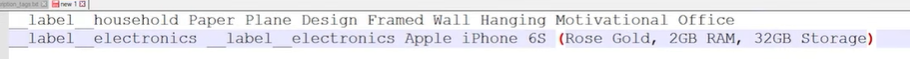

this is the format required for fasttext for text classification. we can change or customise the __label__ prefix

In [ ]:
df.label="__label__" + df.label.astype(str)
df.head()

In [ ]:
df['category_description']=df['label']+" "+df['Text']
df.head()

In [ ]:
import re 
def preprocess(text):
    text=re.sub(r'[^\w\s\']',' ',text)
    text=re.sub(r' +',' ',text)
    return text.strip().lower()

In [ ]:
df['category_description']=df['category_description'].apply(preprocess)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2)

In [ ]:
train.shape, test.shape

In [ ]:
train.to_csv('ecommerce.train', columns=['category_description'], header=None, index=True)
test.to_csv('ecommerce.test', columns=['category_description'], header=None, index=True)

In [ ]:
import fasttext

# it will train the model
model=fasttext.train_supervised(input='ecommerce.train')
# it will test the model
model.test('ecommerce.test')

In [ ]:
model.predict("wintech assemble desktop pc cpu 500 gb stata hdd 4 gb")

In [ ]:
model.predict('rich dad poor dada')

### Chatbots

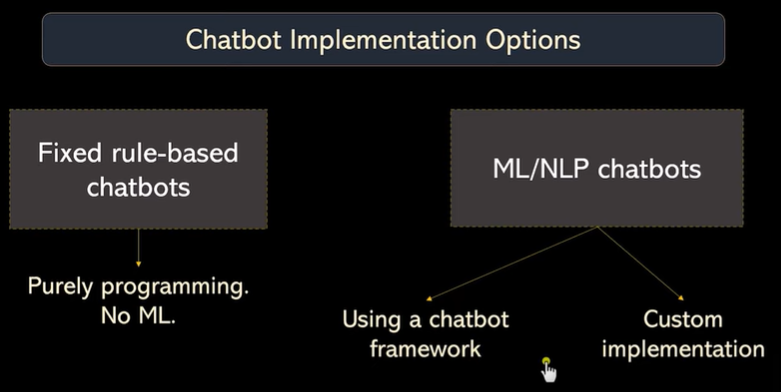

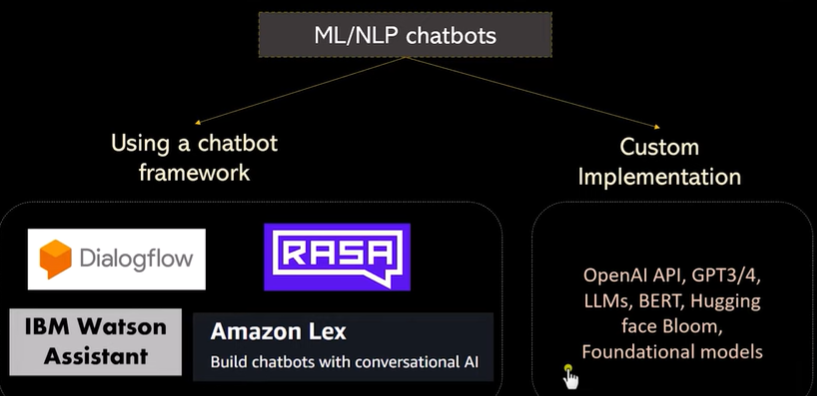